In [1]:
import math
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from scipy import stats
import statistics

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
#import TCRemb_code3
import tcremb.TCRemb as TCRemb
import tcremb.ml_utils as ml_utils
import tcremb.data_proc as data_proc

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [7]:
import warnings
warnings.filterwarnings('ignore')

# clones from plaque and pbmc

In [5]:
run_name = 'athero_2050_vdjdb'
label = 'site'
clones_path_plaque = 'data/athero/athero_2050_plaque_all_contig_annotations.csv'
clones_path_pbmc = 'data/athero/Athero_PBMC_2050_1_clones_TRB.tsv'

In [12]:
tcr_columns = ['cdr3aa','v','j','chain']

In [7]:
data_pbmc = pd.read_csv(clones_path_pbmc,sep='\t')
data_pbmc = data_pbmc.rename({'allVHitsWithScore':'v','allJHitsWithScore':'j','aaSeqcdr3aa':'cdr3aa','cloneId':'data_id'},axis=1)
data_pbmc['chain']='TRB'
data_pbmc

,data_id,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,v,allDHitsWithScore,j,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,cdr3,refPoints,chain
0,0,273279.0,0.051462,4602,0.060072,TGTGCCAGCAGCTTGAACACAGATACGCAGTATTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV5-4*00(196.9),NaN,TRBJ2-3*00(233),TRBC2*00(197.8),427|442|463|0|15||75.0,NaN,22|41|69|17|36||95.0,NaN,TGTGCCAGCAGCTTGAACACAGATACGCAGTATTTT,45,CASSLNTDTQYF,:::::::::0:-1:15:::::17:-2:36:::,TRB
1,2,77363.0,0.014568,1787,0.023327,TGCAGTGCTAGAGAGTGGGGGTCCAACTCTGGGGCCAACGTCCTGA...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,TRBV20-1*00(261.5),TRBD1*00(25),TRBJ2-6*00(262.4),TRBC2*00(171.9),421|435|455|0|14||70.0,18|23|36|16|21||25.0,20|45|73|26|51||125.0,NaN,TGCAGTGCTAGAGAGTGGGGGTCCAACTCTGGGGCCAACGTCCTGA...,45,CSAREWGSNSGANVLTF,:::::::::0:0:14:16:-6:-1:21:26:0:51:::,TRB
2,9,49285.0,0.009281,443,0.005783,TGTGCCAGCAGCTTGAGAGGCAATGAGCAGTTCTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV5-6*00(180.6),NaN,TRBJ2-1*00(218.2),TRBC2*00(210.5),427|442|463|0|15||75.0,NaN,26|42|70|20|36||80.0,NaN,TGTGCCAGCAGCTTGAGAGGCAATGAGCAGTTCTTC,45,CASSLRGNEQFF,:::::::::0:-1:15:::::20:-6:36:::,TRB
3,7,43279.0,0.008150,488,0.006370,TGTGCCAGCAGCCAAGAAGTGGCTAGCGGGGGGTTAAATACGCAGT...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,TRBV4-2*00(328.6),TRBD2*00(40),TRBJ2-3*00(207.6),TRBC2*00(170.7),427|444|464|0|17||85.0,20|28|48|22|30||40.0,27|41|69|37|51||70.0,NaN,TGTGCCAGCAGCCAAGAAGTGGCTAGCGGGGGGTTAAATACGCAGT...,45,CASSQEVASGGLNTQYF,:::::::::0:0:17:22:-4:-4:30:37:-7:51:::,TRB
4,4,38105.0,0.007176,837,0.010926,TGTGCCAGCAGTTTCCAGGGTTTCACTGAAGCTTTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV28*00(403.2),TRBD1*00(25),TRBJ1-1*00(217),TRBC1*00(171.5),427|441|464|0|14||70.0,16|21|36|15|20||25.0,24|40|68|23|39||80.0,NaN,TGTGCCAGCAGTTTCCAGGGTTTCACTGAAGCTTTCTTT,45,CASSFQGFTEAFF,:::::::::0:-3:14:15:-4:-3:20:23:-4:39:::,TRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41301,41181,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTCACCGGGACAGGGTGTTCTACGAGCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(314.7),TRBD1*00(55),TRBJ2-7*00(220),TRBC2*00(172.7),430|444|467|0|14|ST430C|54.0,10|21|36|16|27||55.0,23|39|67|31|47||80.0,NaN,CGTGCCAGCAGCTTCACCGGGACAGGGTGTTCTACGAGCAGTACTTC,45,RASSFTGT_VFYEQYF,:::::::::0:-3:14:16:2:-3:27:31:-3:47:::,TRB
41302,41197,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTAGGCGCGGAGCGGGGGGCCTACGAGCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(304.6),TRBD2*00(30),TRBJ2-7*00(218.1),TRBC2*00(168.1),430|445|467|0|15|ST430C|59.0,22|28|48|22|28||30.0,22|39|67|31|48||85.0,NaN,CGTGCCAGCAGCTTAGGCGCGGAGCGGGGGGCCTACGAGCAGTACTTC,45,RASSLGAERGAYEQYF,:::::::::0:-2:15:22:-6:-4:28:31:-2:48:::,TRB
41303,41221,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTAAGGCCAGGGGACATGAACACTGAAGCTTTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(327),TRBD1*00(30),TRBJ1-1*00(245.4),TRBC1*00(175),430|446|467|0|16|ST430C|64.0,16|22|36|19|25||30.0,18|40|68|26|48||110.0,NaN,CGTGCCAGCAGCTTAAGGCCAGGGGACATGAACACTGAAGCTTTCTTT,45,RASSLRPGDMNTEAFF,:::::::::0:-1:16:19:-4:-2:25:26:2:48:::,TRB
41304,41247,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTGCCAACCTGATGGGGTCGGAAACATTCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(304.6),NaN,TRBJ2-4*00(220),TRBC2*00(175),430|443|467|0|13|ST430C|49.0,NaN,26|42|70|32|48||80.0,NaN,CGTGCCAGCAGCTGCCAACCTGATGGGGTCGGAAACATTCAGTACTTC,45,RASSCQPDGVGNIQYF,:::::::::0:-4:13:::::32:-6:48:::,TRB


In [8]:
data_pbmc_preped = data_proc.remove_asterisk(data_pbmc,tcr_columns)
data_pbmc_preped = data_proc.remove_backslash(data_pbmc_preped,tcr_columns)
data_pbmc_preped = data_proc.filter_clones_data(data_pbmc_preped,tcr_columns)[['data_id'] + tcr_columns]

(41306, 20)
(40074, 20)


In [9]:
data_plaque = pd.read_csv(clones_path_plaque)
data_plaque = data_plaque[data_plaque['is_cell']==True]
data_plaque = data_plaque[data_plaque['high_confidence']==True]
data_plaque = data_plaque.rename({'raw_clonotype_id':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque_b = data_plaque[data_plaque['chain']=='TRB']
data_plaque_b = data_proc.remove_asterisk(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.remove_backslash(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.filter_clones_data(data_plaque_b,tcr_columns)[['data_id'] + tcr_columns]

(1022, 31)
(1007, 31)


In [10]:
data_pbmc_preped['site']='pbmc'
data_plaque_b['site']='plaque'
data_tt = pd.concat([data_pbmc_preped,data_plaque_b]).reset_index(drop=True)

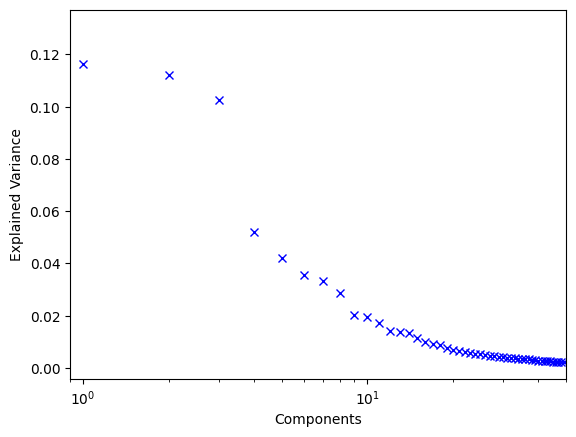

In [14]:
tcremb = TCRemb.TCRemb(run_name)
tcremb.tcremb_clonotypes('TRB',data_tt)
#tcremb.tcremb_dists_count('TRB')
tcremb.tcremb_dists('TRB')
tcremb.tcremb_pca('TRB')
tcremb.tcremb_tsne('TRB')

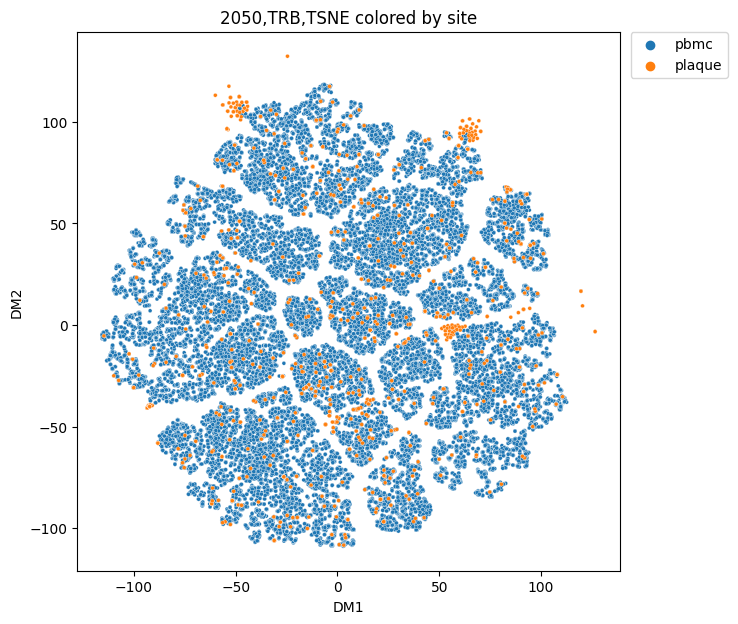

In [15]:
chain = 'TRB'
TCRemb.tsne_plot(pd.concat([tcremb.tsne[chain],tcremb.annot[chain]],axis=1), 'site', f'2050,{chain},TSNE colored by site')

In [ ]:
## Clustering

In [18]:
chain='TRB'
n_clusters = 16358
random_state = 8
kmeans = TCRemb.TCRemb_clustering('KMeans')
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.clstr(chain,tcremb, label,model)

mean fraction_mached only clusters: 0.9844213455477843
median fraction_mached only clusters: 1.0
purity:0.9826252597552528


In [30]:
clstr_data = pd.merge(kmeans.clstr_labels['TRB'],tcremb.tsne['TRB'])
clstr_data=clstr_data.merge(kmeans.binom_res['TRB'].rename({'site':'clstr_site'},axis=1))

In [31]:
clstr_data

,cluster,annotId,label_cluster,total_cluster,total_group,count_mached,fraction_mached,fraction_mached_exp,p_value,is_cluster,enriched_clstr,DM1,DM2,clstr_site
0,98,0,plaque,82,1003,79,0.963415,0.024526,4.957728e-123,1,1,-92.347267,-39.622128,plaque
1,98,5771,plaque,82,1003,79,0.963415,0.024526,4.957728e-123,1,1,-89.565231,-35.488480,plaque
2,98,6629,plaque,82,1003,79,0.963415,0.024526,4.957728e-123,1,1,-91.908546,-37.249557,plaque
3,98,40076,plaque,82,1003,79,0.963415,0.024526,4.957728e-123,1,1,-92.348061,-39.622124,plaque
4,98,40093,plaque,82,1003,79,0.963415,0.024526,4.957728e-123,1,1,-92.347855,-39.622334,plaque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40891,9291,41047,plaque,1,1003,1,1.000000,0.024526,2.452563e-02,0,0,-42.319981,10.532200,plaque
40892,14665,41052,plaque,1,1003,1,1.000000,0.024526,2.452563e-02,0,0,15.981517,-66.098717,plaque
40893,12982,41053,plaque,1,1003,1,1.000000,0.024526,2.452563e-02,0,0,79.173141,61.769142,plaque
40894,13695,41058,plaque,1,1003,1,1.000000,0.024526,2.452563e-02,0,0,28.005291,58.840797,plaque


In [54]:
kmeans.binom_res[chain]['cluster'] = kmeans.binom_res[chain]['cluster'].astype(int)

In [35]:
chosen_clusters_df['count_in_clstr_site'] = chosen_clusters_df.groupby(['cluster','site','cdr3aa','v','j'])['cdr3aa'].transform('count')

In [54]:
chosen_clusters_df[chosen_clusters_df['cluster']==1826].drop_duplicates(['site','cdr3aa','v','j'])[['cluster','total_cluster','label_cluster','site','count_in_clstr_site','cdr3aa','v','j']]

,cluster,total_cluster,label_cluster,site,count_in_clstr_site,cdr3,v,j
3,1826,9,plaque,pbmc,1,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3
39961,1826,9,plaque,plaque,8,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3


## Explain why it is not one dot in tsne

In [59]:
clstr_data=clstr_data.merge(tcremb.tsne['TRB'])

In [66]:
clstr_data['plt_clusters']=clstr_data['cluster'].apply(lambda x: x if x in plt_clusters else 'other')

In [61]:
plt_clusters_string = list(map(str, plt_clusters))
plt_clusters_string

['98', '283', '506', '146', '360', '310', '332', '2311', '2551', '356']

In [62]:
custom_palette = ml_utils.make_custom_palette(plt_clusters_string)

In [67]:
clstr_data['plt_clusters'] = clstr_data['plt_clusters'].astype(str)

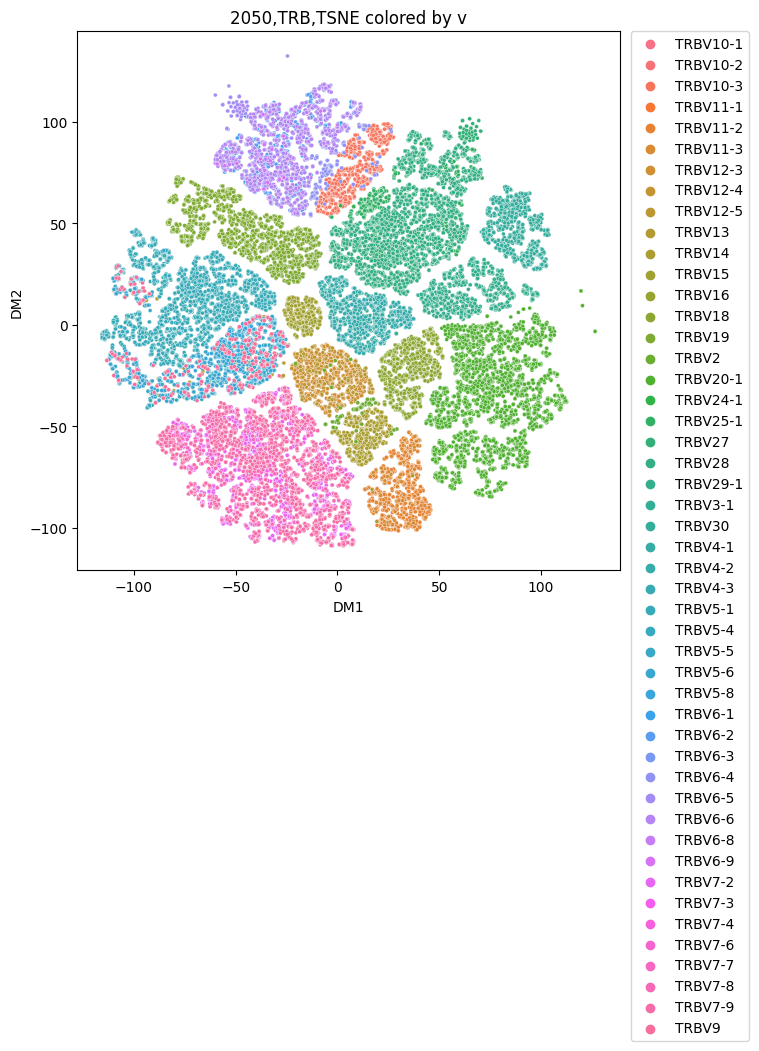

In [110]:
ml_utils.tsne_plot(pd.merge(tcremb.annot['TRB'],tcremb.tsne['TRB']), 'v', f'2050,{chain},TSNE colored by v')

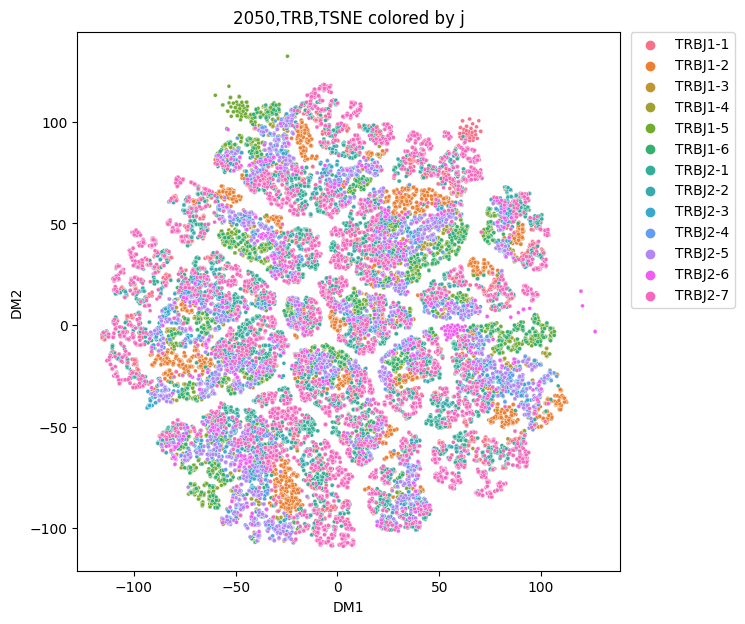

In [111]:
ml_utils.tsne_plot(pd.merge(tcremb.annot['TRB'],tcremb.tsne['TRB']), 'j', f'2050,{chain},TSNE colored by j')

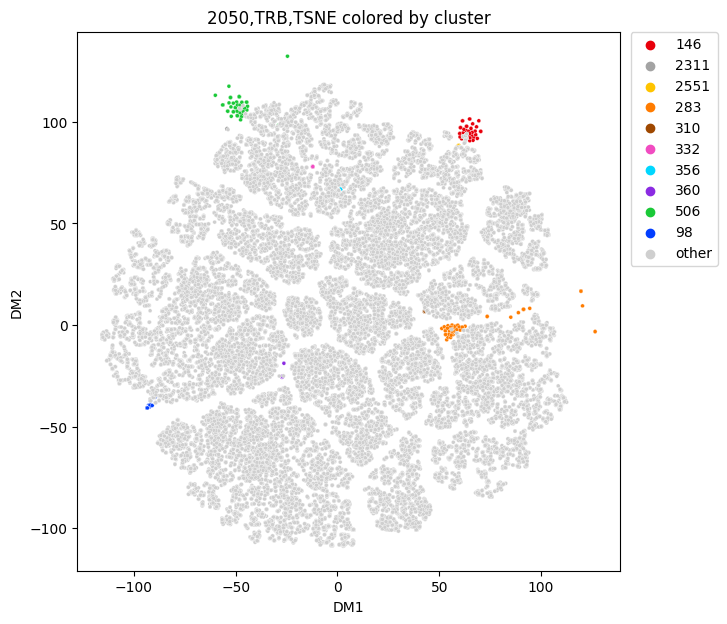

In [79]:
chain = 'TRB'
ml_utils.tsne_plot(clstr_data, 'plt_clusters', f'2050,{chain},TSNE colored by cluster',custom_palette=custom_palette)

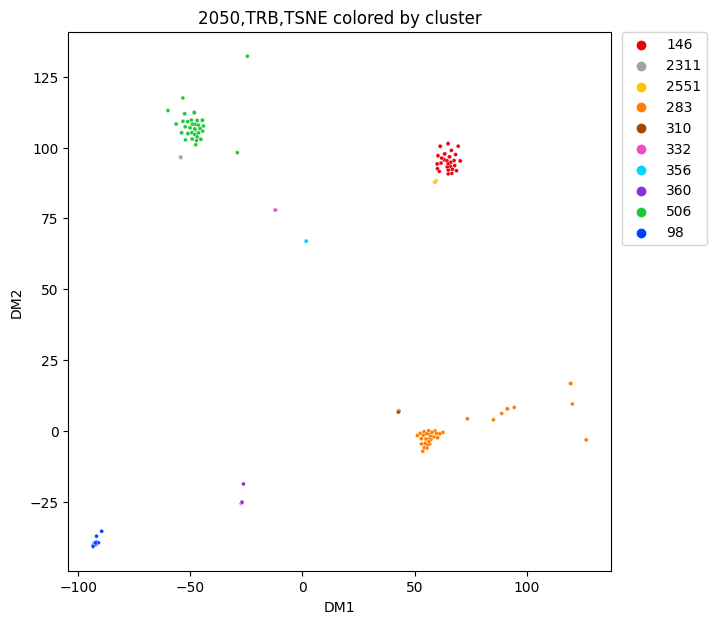

In [83]:
chain = 'TRB'
ml_utils.tsne_plot(clstr_data[clstr_data['plt_clusters']!='other'], 'plt_clusters', f'2050,{chain},TSNE colored by cluster',custom_palette=custom_palette)

In [73]:
clstr_data.columns

Index(['cluster', 'annotId', 'label_cluster', 'total_cluster', 'total_group',
       'count_mached', 'fraction_mached', 'fraction_mached_exp', 'p_value',
       'is_cluster', 'enriched_clstr', 'data_id', 'cdr3', 'v', 'j', 'chain',
       'site', 'cloneId', 'DM1', 'DM2', 'plt_clusters'],
      dtype='object')

In [138]:
tcremb.pca['TRB'][tcremb.pca['TRB']['annotId'].isin([40084,40091,40097,40112])]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,annotId
39903,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40084
39910,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40091
39916,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40097
39931,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40112


In [137]:
tcremb.pca['TRB'][tcremb.pca['TRB']['annotId'].isin([40084,40091,40097,40112])].drop('annotId',axis=1).drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
39903,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,-156.168322,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869


In [84]:
clstr_data[clstr_data['cluster']==356][['cluster','annotId','total_cluster','cdr3aa','v','j','DM1','DM2','cloneId']]

,cluster,annotId,total_cluster,cdr3,v,j,DM1,DM2,cloneId
74,356,74,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.674153,66.947227,5822
19467,356,19583,10,CASSEDPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.680893,66.956642,5784
39914,356,40095,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
39944,356,40126,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40147,356,40329,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40149,356,40331,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40297,356,40479,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40451,356,40634,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40538,356,40721,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40717,356,40902,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822


In [81]:
clstr_data[clstr_data['cluster']==360][['cluster','annotId','total_cluster','cdr3aa','v','j','DM1','DM2','cloneId']]

,cluster,annotId,total_cluster,cdr3,v,j,DM1,DM2,cloneId
92,360,92,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979258,-25.299942,25611
28617,360,28760,23,CASSSDLTGWSTGELFF,TRBV13,TRBJ2-2,-27.323254,-25.678175,25604
38152,360,38331,23,CASSSDPTGRSTGELFF,TRBV13,TRBJ2-2,-26.322882,-18.796103,25609
39898,360,40079,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
39939,360,40121,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
39999,360,40181,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979204,-25.300310,25611
40030,360,40212,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
40073,360,40255,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979052,-25.300709,25611
40111,360,40293,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.978886,-25.300283,25611
40166,360,40348,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.978886,-25.300283,25611


# plaque and VDJdb

In [6]:
run_name = 'athero_2050_vdjdb'
label = 'antigen.epitope'
clones_path_plaque = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/athero_2050_plaque_all_contig_annotations.csv'
vdjdb_path = 'data/data_preped/VDJdb_data.csv'
#clones_path_pbmc = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/Athero_PBMC_2050_1_clones_TRB.tsv'

In [18]:
data_preped = pd.read_csv(vdjdb_path,sep='\t')
data_preped['data_resource']='VDJdb'
data_preped['data_type']='train'

data_preped_b = data_preped[data_preped['chain']=='TRB']
data_preped_b.shape

(24146, 35)

In [15]:
data_plaque = pd.read_csv(clones_path_plaque)
data_plaque = data_plaque[data_plaque['is_cell']==True]
data_plaque = data_plaque[data_plaque['high_confidence']==True]
data_plaque = data_plaque.rename({'cdr3':'cdr3aa','raw_clonotype_id':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque_b = data_plaque[data_plaque['chain']=='TRB']
data_plaque_b = data_proc.remove_asterisk(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.remove_backslash(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.filter_clones_data(data_plaque_b,tcr_columns)[['data_id'] + tcr_columns]

(1022, 31)
(1007, 31)


In [16]:
data_plaque_b['data_resource']='10x_plaque'
data_plaque_b['data_type']='pred'

In [17]:
data_tt = pd.concat([data_preped_b,data_plaque_b]).reset_index(drop=True)
data_tt

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.species_freq,antigen.species_freq_10,antigen.species_freq_20,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000,data_resource,data_type
0,TRB,CASSAFPCREGRNNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-1,TRBJ2-1,4.0,...,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,VDJdb,train
1,TRB,CASSHGVGQGPYEQYF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV4-1,TRBJ2-7,4.0,...,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,VDJdb,train
2,TRB,CASSLTTESGEQYF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV7-9,TRBJ2-7,5.0,...,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,VDJdb,train
3,TRB,CASSLGTLEETQYF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-5,TRBJ2-5,4.0,...,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,VDJdb,train
4,TRB,CASIPEGGRETQYF,HomoSapiens,GLCTLVAML,BMLF1,EBV,0,TRBV7-8,TRBJ2-5,3.0,...,EBV,EBV,EBV,EBV,EBV,EBV,EBV,EBV,VDJdb,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25148,TRB,CASSLNTDTQYF,NaN,NaN,NaN,NaN,NaN,TRBV5-4,TRBJ2-3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10x_plaque,pred
25149,TRB,CSAREWGSNSGANVLTF,NaN,NaN,NaN,NaN,NaN,TRBV20-1,TRBJ2-6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10x_plaque,pred
25150,TRB,CASSYQGTQPQHF,NaN,NaN,NaN,NaN,NaN,TRBV6-5,TRBJ1-5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10x_plaque,pred
25151,TRB,CASSSGIPRSGELFF,NaN,NaN,NaN,NaN,NaN,TRBV5-1,TRBJ2-2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10x_plaque,pred


In [19]:
run_name

'athero_2050_vdjdb'

In [ ]:
tcremb = TCRemb.TCRemb(run_name)
tcremb.tcremb_clonotypes('TRB',data_tt)
tcremb.tcremb_dists_count('TRB')
tcremb.tcremb_dists('TRB')
tcremb.tcremb_pca('TRB')
tcremb.tcremb_tsne('TRB')

['/home/ykremlyakova/projects/tcr_emb', '/home/ykremlyakova/.conda/envs/py311/lib/python311.zip', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/lib-dynload', '', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages', '../', 'mirpy/']
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]


## Chechk VDJdb

In [139]:
vdjdb_data_path = 'mirpy/notebooks/assets/vdjdb.slim.txt'


In [175]:
vdjdb_data = pd.read_csv(vdjdb_data_path,sep='\t')
vdjdb_data = vdjdb_data.rename({'gene':'chain','v.segm':'v','j.segm':'j'},axis=1)
vdjdb_data = data_proc.remove_asterisk(vdjdb_data, tcr_columns)


In [179]:
def epitope_in_vdjdb(vdjdb_data, v, j, cdr3aa):
    epis = list(vdjdb_data[(vdjdb_data['v']==v)&(vdjdb_data['j']==j)&(vdjdb_data['cdr3aa']==cdr3aa)]['antigen.epitope'])
    if len(epis)==1:
        return epis[0]
    elif len(epis)>1:
        #print('more 1 epi!')
        return epis
    else:
        None
    
    

In [180]:
data_tt_copy = data_tt#.head(5000)

In [181]:
data_tt_copy['epitope_vdjdb']=data_tt_copy.apply(lambda x: epitope_in_vdjdb(vdjdb_data, x.v, x.j, x.cdr3aa) ,axis=1)

more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!


In [185]:
data_in_vdjdb = data_tt_copy[-data_tt_copy['epitope_vdjdb'].isna()]

In [188]:
clstr_data.shape

(40896, 22)

In [191]:
t = clstr_data.merge(data_in_vdjdb,how='left')

In [194]:
t[(t['plt_clusters']!='other')&(-t['epitope_vdjdb'].isna())]

,cluster,annotId,label_cluster,total_cluster,total_group,count_mached,fraction_mached,fraction_mached_exp,p_value,is_cluster,...,cdr3,v,j,chain,site,cloneId,clstr_site,plt_clusters,epitope_vdjdb,cdr3_in_vdjdb
151,2551,4,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,7454,plaque,2551,NLVPMVATV,1.0
156,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
157,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
158,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
159,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
160,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
161,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
162,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
163,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
164,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0


In [ ]:
t